<a href="https://colab.research.google.com/github/adgcal/Anjan_collab_R/blob/main/tif2gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
os.chdir("/content/drive/My Drive/concentration/1")


In [6]:
!ls

000.tif  010_1.tif  020_1.tif  040_1.tif  080_1.tif  160_1.tif	tif2gray.ipynb


In [7]:
import cv2

In [8]:
img= cv2.imread('000.tif')

In [ ]:
from google.colab.patches import cv2_imshow

if img is None:
    print("Error reading image! Please check the file path.")
else:
    # Process and display the image (assuming img is valid now)
    cv2_imshow(img)


In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)


In [ ]:
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh_img)


In [16]:
import numpy as np


def box_counting(image, epsilon):
  """
  Calculates the box dimension of a binary image using box counting.

  Args:
      image: A 2D NumPy array representing the binary image.
      epsilon: Minimum box size to consider (to avoid division by zero).

  Returns:
      A tuple containing:
          box_sizes: A list of box sizes used in the calculation.
          box_counts: A list of corresponding box counts for each size.
  """
  box_sizes = []
  box_counts = []
  height, width = image.shape

  # Iterate through potential box sizes
  for box_size in range(epsilon, min(height, width) // 2 + 1):
    # Count the number of boxes needed to cover the image
    box_count = 0
    for y in range(0, height, box_size):
      for x in range(0, width, box_size):
        # Check if the box overlaps a foreground pixel
        box = image[y:y+box_size, x:x+box_size]
        if np.any(box):
          box_count += 1

    box_sizes.append(box_size)
    box_counts.append(box_count)

  return box_sizes, box_counts





In [17]:

def calculate_fractal_dimension(box_sizes, box_counts):
  """
  Calculates the fractal dimension from the box sizes and counts.

  Args:
      box_sizes: A list of box sizes used in the calculation.
      box_counts: A list of corresponding box counts for each size.

  Returns:
      The estimated fractal dimension of the image.
  """
  # Convert box sizes and counts to log scale
  log_box_sizes = np.log(box_sizes)
  log_box_counts = np.log(box_counts)

  # Perform linear regression to find the slope
  slope, _ = np.polyfit(log_box_sizes, log_box_counts, 1)

  # Fractal dimension is negative of the slope
  fractal_dimension = -slope

  return fractal_dimension


In [18]:
def main():
  # Load the image (replace with your image path)
  # image_path = "path/to/your/binary_image.jpg"
  # image = cv2.imread(image_path, 0)  # Read as grayscale

  # Convert to binary (if needed)
  # _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

  # Minimum box size to avoid division by zero
  epsilon = 1

  # Calculate box sizes and counts
  box_sizes, box_counts = box_counting(thresh_img, epsilon)

  # Calculate the fractal dimension
  fractal_dimension = calculate_fractal_dimension(box_sizes, box_counts)

  print("Estimated fractal dimension:", fractal_dimension)

if __name__ == "__main__":
  main()


Estimated fractal dimension: 1.8584424742265373


In [20]:
# prompt: The fractal domension is evaluated for one image 000.tif in the directory "/content/drive/My Drive/concentration/1". Want to make a table for all fractal dimension in the directories "/content/drive/My Drive/concentration/1" and "/content/drive/My Drive/concentration/12'  with tif extension. Code suggestion?

import os
import cv2
import numpy as np

def box_counting(image, epsilon):
    """
    Calculates the box dimension of a binary image using box counting.

    Args:
        image: A 2D NumPy array representing the binary image.
        epsilon: Minimum box size to consider (to avoid division by zero).

    Returns:
        A tuple containing:
            box_sizes: A list of box sizes used in the calculation.
            box_counts: A list of corresponding box counts for each size.
    """
    box_sizes = []
    box_counts = []
    height, width = image.shape

    # Iterate through potential box sizes
    for box_size in range(epsilon, min(height, width) // 2 + 1):
        # Count the number of boxes needed to cover the image
        box_count = 0
        for y in range(0, height, box_size):
            for x in range(0, width, box_size):
                # Check if the box overlaps a foreground pixel
                box = image[y:y+box_size, x:x+box_size]
                if np.any(box):
                    box_count += 1

        box_sizes.append(box_size)
        box_counts.append(box_count)

    return box_sizes, box_counts


def calculate_fractal_dimension(box_sizes, box_counts):
    """
    Calculates the fractal dimension from the box sizes and counts.

    Args:
        box_sizes: A list of box sizes used in the calculation.
        box_counts: A list of corresponding box counts for each size.

    Returns:
        The estimated fractal dimension of the image.
    """
    # Convert box sizes and counts to log scale
    log_box_sizes = np.log(box_sizes)
    log_box_counts = np.log(box_counts)

    # Perform linear regression to find the slope
    slope, _ = np.polyfit(log_box_sizes, log_box_counts, 1)

    # Fractal dimension is negative of the slope
    fractal_dimension = -slope

    return fractal_dimension


def main():
    # Define the directories
    directories = ["/content/drive/My Drive/concentration/1", "/content/drive/My Drive/concentration/2"]

    # Create a table to store the results
    table = {"File Name": [], "Fractal Dimension": []}

    # Iterate through the directories and process each image
    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith(".tif"):
                # Load the image
                image_path = os.path.join(directory, filename)
                image = cv2.imread(image_path, 0)

                # Convert to binary (if needed)
                _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

                # Calculate the fractal dimension
                fractal_dimension = calculate_fractal_dimension(*box_counting(binary_image, 1))

                # Add the results to the table
                table["File Name"].append(filename)
                table["Fractal Dimension"].append(fractal_dimension)

    # Print the table
    import pandas as pd
    df = pd.DataFrame(table)
    print(df.to_string())


if __name__ == "__main__":
    main()


    File Name  Fractal Dimension
0     000.tif           1.848868
1   010_1.tif           1.847018
2   020_1.tif           1.855085
3   040_1.tif           1.813554
4   080_1.tif           1.858179
5   160_1.tif           1.883609
6   010_2.tif           1.622210
7     002.tif           1.861459
8   020_2.tif           1.875062
9   160_2.tif           1.881718
10  080_2.tif           1.875980
11  040_2.tif           1.876844


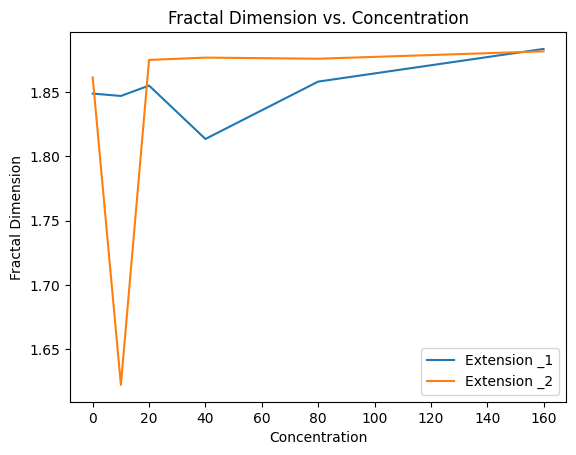

In [31]:
# prompt:  want to plot the fractal dimesion for files with extesions _1 and _2 against the concentration values [0,10,20,40,80,160] - the two plot sets with 0     000.tif           1.848868


import matplotlib.pyplot as plt

# Define the concentration values
concentrations = [0, 10, 20, 40, 80, 160]

# Define the fractal dimensions for files with extensions _1 and _2
fractal_dimensions_1 = [1.848868, 1.847018, 1.855085, 1.813554, 1.858179, 1.883609]
fractal_dimensions_2 = [1.861459,1.622210,1.875062,1.876844,1.875980,1.881718]

# Create the plot
plt.plot(concentrations, fractal_dimensions_1, label="Extension _1")
plt.plot(concentrations, fractal_dimensions_2, label="Extension _2")

# Add labels and title
plt.xlabel("Concentration")
plt.ylabel("Fractal Dimension")
plt.title("Fractal Dimension vs. Concentration")

# Add legend and show the plot
plt.legend()
plt.show()
